In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.spatial.transform import Rotation as R

In [3]:
left = pd.read_csv('David-50-pokus01\Xsens_DOT_3_D422CD006379_20250409_104913.csv', skiprows=7, sep=",")
right = pd.read_csv('David-50-pokus01\Xsens_DOT_4_D422CD006380_20250409_104913.csv', skiprows=7, sep=",")
pelvis = pd.read_csv('David-50-pokus01\Xsens_DOT_2_D422CD006474_20250409_104913.csv', skiprows=7, sep=",")

In [4]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
left['real_ticks'] = left['SampleTimeFine'] - left['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
left['time_s'] = left['real_ticks'] * 1e-6

# Convert seconds to milliseconds
left['time_ms'] = left['time_s'] * 1000
#  show the actual intervals between samples
left['delta_ms'] = left['time_ms'].diff()

In [5]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
right['real_ticks'] = right['SampleTimeFine'] - right['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
right['time_s'] = right['real_ticks'] * 1e-6

# Convert seconds to milliseconds
right['time_ms'] = right['time_s'] * 1000
#  show the actual intervals between samples
right['delta_ms'] = right['time_ms'].diff()

In [6]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
pelvis['real_ticks'] = pelvis['SampleTimeFine'] - pelvis['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
pelvis['time_s'] = pelvis['real_ticks'] * 1e-6

# Convert seconds to milliseconds
pelvis['time_ms'] = pelvis['time_s'] * 1000
#  show the actual intervals between samples
pelvis['delta_ms'] = pelvis['time_ms'].diff()

In [7]:
left.head(10)

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
0,0,1607860018,-173.586258,-88.626701,107.056412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000,NaN
1,1,1607876685,-173.670959,-88.621437,107.157219,9.773009,0.009794,-0.249013,1.399881,0.141555,0.222991,16667,0.016667,16.667,16.667
2,2,1607893352,-173.730133,-88.616058,107.225388,9.758099,0.029466,-0.259871,1.741350,0.131963,0.253201,33334,0.033334,33.334,16.667
3,3,1607910019,-173.921432,-88.613228,107.411781,9.798561,0.021218,-0.240829,0.382494,0.273435,0.075461,50001,0.050001,50.001,16.667
4,4,1607926686,-174.119919,-88.608162,107.609444,9.813557,-0.038344,-0.320160,0.771743,0.166937,0.065421,66668,0.066668,66.668,16.667
5,5,1607943353,-174.240021,-88.605064,107.735283,9.795274,0.019422,-0.259917,0.892340,0.278967,0.164325,83335,0.083335,83.335,16.667
6,6,1607960020,-174.394745,-88.601707,107.890450,9.759882,-0.008067,-0.326875,0.812108,0.246554,0.118209,100002,0.100002,100.002,16.667
7,7,1607976687,-174.422974,-88.593895,107.932983,9.751965,0.016170,-0.310375,1.639258,0.005577,0.307051,116669,0.116669,116.669,16.667
8,8,1607993354,-174.591187,-88.585426,108.110641,9.773182,0.029907,-0.266095,0.917902,-0.063391,0.121359,133336,0.133336,133.336,16.667
9,9,1608010021,-174.844254,-88.575912,108.359406,9.789434,0.000883,-0.244162,0.738958,-0.140037,0.002888,150003,0.150003,150.003,16.667


In [8]:
right.head(10)

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
0,0,1607860018,-34.950737,-86.538986,66.922844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000,NaN
1,1,1607876685,-34.957100,-86.542999,66.933441,9.742603,-0.379648,0.488553,0.154169,-0.118958,-1.370459,16667,0.016667,16.667,16.667
2,2,1607893352,-34.948639,-86.544075,66.922592,9.765743,-0.408807,0.513513,0.623817,0.034199,-1.291495,33334,0.033334,33.334,16.667
3,3,1607910019,-34.951221,-86.542152,66.936539,9.757920,-0.406964,0.537707,0.626596,0.150212,-1.164430,50001,0.050001,50.001,16.667
4,4,1607926686,-34.931854,-86.538811,66.924667,9.783468,-0.403216,0.478358,0.522723,0.270464,-1.186777,66668,0.066668,66.668,16.667
5,5,1607943353,-34.895245,-86.535927,66.881142,9.762775,-0.393119,0.498226,-0.595982,0.337018,-1.301138,83335,0.083335,83.335,16.667
6,6,1607960020,-34.847225,-86.534798,66.826706,9.723853,-0.433274,0.508861,-0.349825,0.254244,-1.389585,100002,0.100002,100.002,16.667
7,7,1607976687,-34.833431,-86.538918,66.803223,9.739558,-0.414420,0.533203,-0.533762,-0.057225,-1.467601,116669,0.116669,116.669,16.667
8,8,1607993354,-34.845669,-86.547760,66.829964,9.714067,-0.409650,0.567066,0.767376,-0.390056,-1.488687,133336,0.133336,133.336,16.667
9,9,1608010021,-34.903389,-86.556335,66.904160,9.745429,-0.356492,0.540494,0.857942,-0.476601,-1.340786,150003,0.150003,150.003,16.667


In [9]:
pelvis.head(10)

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
0,0,1607843351,36.775726,-86.671394,13.272182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000,NaN
1,1,1607860018,36.780804,-86.665871,13.271647,9.823255,0.214549,0.535771,0.820381,-0.701801,0.462905,16667,0.016667,16.667,16.667
2,2,1607876685,36.773621,-86.652451,13.283276,9.854137,0.205249,0.615227,0.791394,-0.307372,0.219475,33334,0.033334,33.334,16.667
3,3,1607893352,36.821060,-86.644218,13.250474,9.832771,0.222084,0.596367,0.891143,-0.664105,0.246138,50001,0.050001,50.001,16.667
4,4,1607910019,36.734947,-86.640244,13.332602,9.857924,0.243331,0.521637,0.461791,-0.612566,0.773894,66668,0.066668,66.668,16.667
5,5,1607926686,36.645306,-86.633438,13.421897,9.823310,0.207531,0.538723,0.466875,-0.464153,0.674888,83335,0.083335,83.335,16.667
6,6,1607943353,36.555939,-86.625130,13.514371,9.784780,0.209336,0.530744,0.548983,-0.386809,0.623080,100002,0.100002,100.002,16.667
7,7,1607960020,36.488739,-86.619278,13.584394,9.770255,0.244711,0.551879,0.696422,-0.549360,0.660936,116669,0.116669,116.669,16.667
8,8,1607976687,36.497688,-86.625015,13.576014,9.741570,0.231114,0.558532,0.557620,-1.271645,0.850335,133336,0.133336,133.336,16.667
9,9,1607993354,36.557137,-86.628326,13.517493,9.759730,0.224089,0.556158,0.675772,-1.254036,0.624943,150003,0.150003,150.003,16.667


In [10]:
acc_left = left[['Acc_X', 'Acc_Y', 'Acc_Z']]

<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='time_ms'>

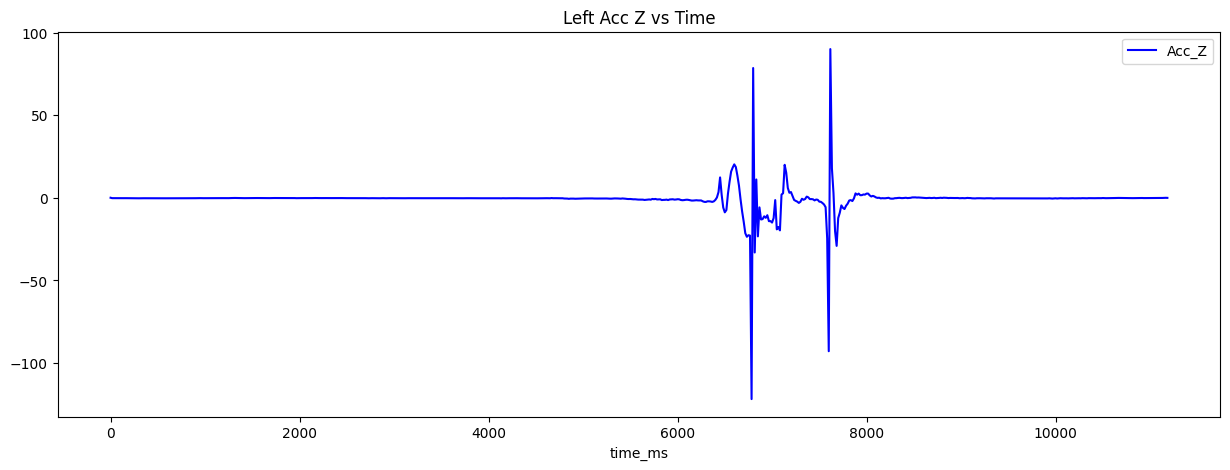

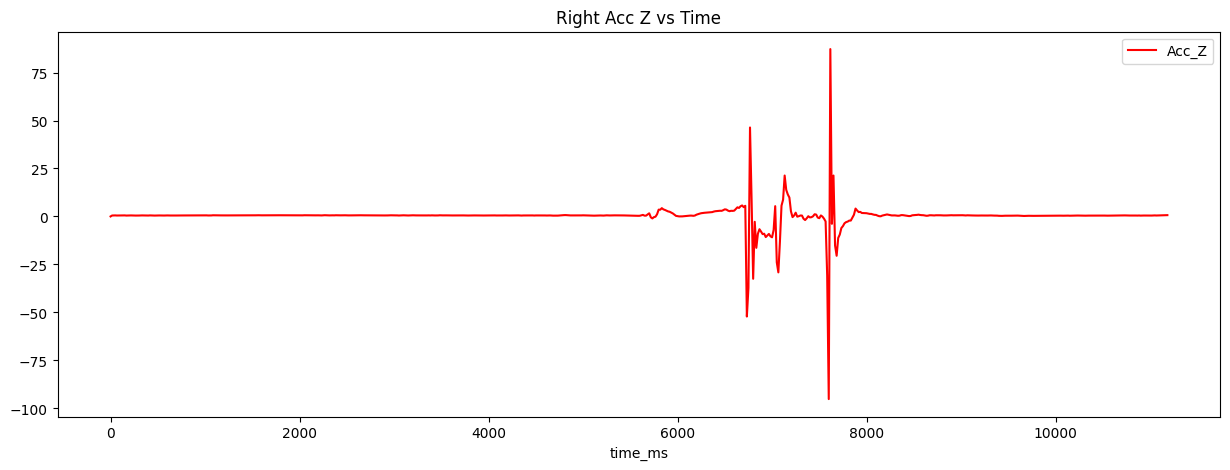

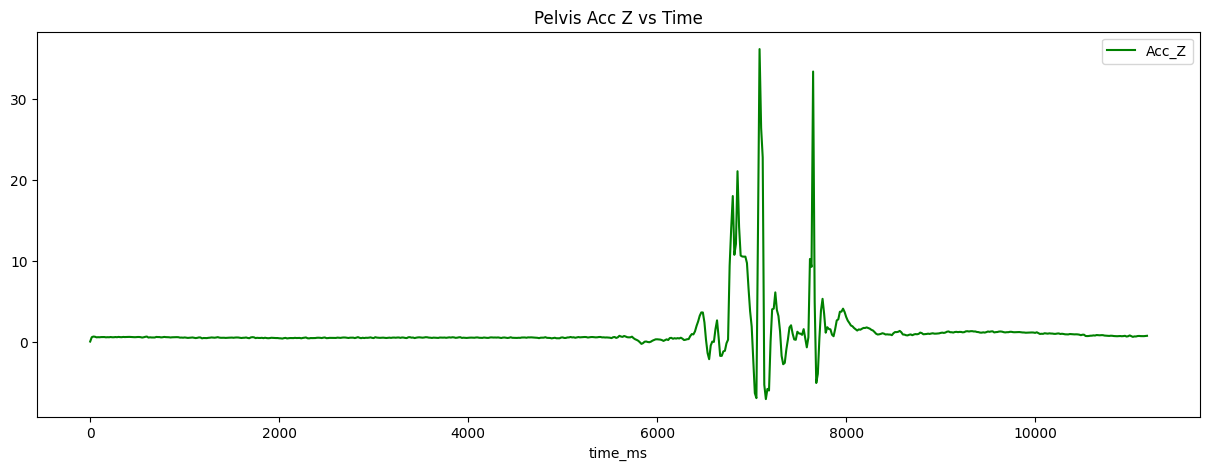

In [21]:
# visualize the data and find the connection between the accelerometer  and times 
left.plot(x='time_ms', y='Acc_Z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='time_ms', y='Acc_Z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='time_ms', y='Acc_Z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')

In [16]:
left[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,672.000000,672.000000
mean,-0.848848,5591.778500
std,8.596066,3235.630951
min,-121.898544,0.000000
25%,-0.424608,2795.889250
50%,-0.293431,5591.778500
75%,-0.211629,8387.667750
max,90.000832,11183.557000


In [17]:
right[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,672.000000,672.000000
mean,0.219769,5591.778500
std,6.786553,3235.630951
min,-95.211655,0.000000
25%,0.448186,2795.889250
50%,0.521022,5591.778500
75%,0.580052,8387.667750
max,87.241074,11183.557000


In [18]:
pelvis[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,672.000000,672.000000
mean,1.088022,5591.778500
std,3.067529,3235.630951
min,-7.115994,0.000000
25%,0.462086,2795.889250
50%,0.527105,5591.778500
75%,0.961803,8387.667750
max,36.169914,11183.557000


In [12]:
euler = left[[ 'Euler_X', 'Euler_Y', 'Euler_Z']]
rot = R.from_euler('xyz', euler, degrees=True)
acc_earth = rot.apply(acc_left)